Based on: https://www.tensorflow.org/text/tutorials/classify_text_with_bert
Completed tutorial to get familiar with BERT

In [1]:
#Data Visualization
import pandas as pd

#load data
resume = pd.read_csv("/content/UpdatedResumeDataSet.csv")

#view all of the categories
len(resume.iloc[:, 0].unique())
#25 categories
resume.iloc[:, 0].unique()
#note that all of the categories are good, there doesnt need for there to be any
#more data marshalling for the categories
#this is why I choose this data set


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [2]:
#view head
resume.head()
#note all the crappy characters in the resume to be cleaned

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


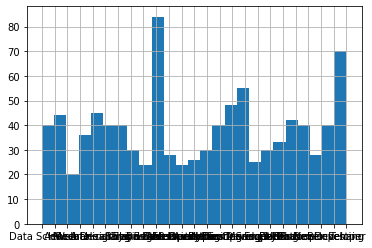

In [3]:
#view 
resume.Category.hist(bins=25)
#looks like a pretty even distribution of categories, the minimum number of resumes for 1 particular categories is 20

In [4]:
#find number of resumes for training versus validation set
len(resume)
#962 resumes

962*.2
#193 resumes for 20% validation
962-193
#769 entries for training

769

In [5]:
#label encoding categories
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
resume["Category"] = resume["Category"].astype('category')
resume.dtypes
d = dict(enumerate(resume.Category))
print (d)

{0: 'Data Science', 1: 'Data Science', 2: 'Data Science', 3: 'Data Science', 4: 'Data Science', 5: 'Data Science', 6: 'Data Science', 7: 'Data Science', 8: 'Data Science', 9: 'Data Science', 10: 'Data Science', 11: 'Data Science', 12: 'Data Science', 13: 'Data Science', 14: 'Data Science', 15: 'Data Science', 16: 'Data Science', 17: 'Data Science', 18: 'Data Science', 19: 'Data Science', 20: 'Data Science', 21: 'Data Science', 22: 'Data Science', 23: 'Data Science', 24: 'Data Science', 25: 'Data Science', 26: 'Data Science', 27: 'Data Science', 28: 'Data Science', 29: 'Data Science', 30: 'Data Science', 31: 'Data Science', 32: 'Data Science', 33: 'Data Science', 34: 'Data Science', 35: 'Data Science', 36: 'Data Science', 37: 'Data Science', 38: 'Data Science', 39: 'Data Science', 40: 'HR', 41: 'HR', 42: 'HR', 43: 'HR', 44: 'HR', 45: 'HR', 46: 'HR', 47: 'HR', 48: 'HR', 49: 'HR', 50: 'HR', 51: 'HR', 52: 'HR', 53: 'HR', 54: 'HR', 55: 'HR', 56: 'HR', 57: 'HR', 58: 'HR', 59: 'HR', 60: 'HR',

In [6]:
resume["Category"] = resume["Category"].cat.codes
resume.head()

,Category,Resume
0,6,Skills * Programming Languages: Python (pandas...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...
2,6,"Areas of Interest Deep Learning, Control Syste..."
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
resume.iloc[:, 0].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int8)

In [8]:
d = dict(enumerate(resume.Category))
print (d)

{0: 6, 1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 9: 6, 10: 6, 11: 6, 12: 6, 13: 6, 14: 6, 15: 6, 16: 6, 17: 6, 18: 6, 19: 6, 20: 6, 21: 6, 22: 6, 23: 6, 24: 6, 25: 6, 26: 6, 27: 6, 28: 6, 29: 6, 30: 6, 31: 6, 32: 6, 33: 6, 34: 6, 35: 6, 36: 6, 37: 6, 38: 6, 39: 6, 40: 12, 41: 12, 42: 12, 43: 12, 44: 12, 45: 12, 46: 12, 47: 12, 48: 12, 49: 12, 50: 12, 51: 12, 52: 12, 53: 12, 54: 12, 55: 12, 56: 12, 57: 12, 58: 12, 59: 12, 60: 12, 61: 12, 62: 12, 63: 12, 64: 12, 65: 12, 66: 12, 67: 12, 68: 12, 69: 12, 70: 12, 71: 12, 72: 12, 73: 12, 74: 12, 75: 12, 76: 12, 77: 12, 78: 12, 79: 12, 80: 12, 81: 12, 82: 12, 83: 12, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 1

In [9]:
#data clean up
#remove special characters with regular expressions
#https://stackoverflow.com/questions/43358857/how-to-remove-special-characters-except-space-from-a-file-in-python
#https://stackoverflow.com/questions/25292838/applying-regex-to-a-pandas-dataframe
import re

#removes special chars
def clean_chars(clean):
    return re.sub(r"[^a-zA-Z0-9]+", ' ', clean)

# test = "Details \r\nMay 2013 to May 2017 B."
# final = [re.sub(r"[^a-zA-Z0-9]+", ' ', test)]
# print(final)
#['Details May 2013 to May 2017 B ']

#need to strip trailing white spaces
resume.Resume = resume.Resume.apply(lambda x: clean_chars(x).strip())
resume.Resume

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958    Willingness to accept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [10]:
resume.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [11]:
#data restrict length to 256 characters
import itertools

#https://stackoverflow.com/questions/22767509/python-get-the-x-first-words-in-a-string
# test = 'Computer Skills Proficient in MS office Word B'
# test = test.split(' ')
# test = test[:5]
# test
# #['Computer', 'Skills', 'Proficient', 'in', 'MS']
# test = ' '.join(test)
# test

resume.Resume = resume.Resume.apply(lambda x: ' '.join(x.split(' ')[:256]))
resume.Resume

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958    Willingness to accept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [12]:
#take look at fully clean data
resume.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [13]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.8.*"

     |████████████████████████████████| 4.9 MB 5.3 MB/s 
     |████████████████████████████████| 497.9 MB 4.1 kB/s 
     |████████████████████████████████| 1.4 MB 52.0 MB/s 
     |████████████████████████████████| 5.8 MB 45.9 MB/s 
     |████████████████████████████████| 462 kB 62.9 MB/s 


In [14]:
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 1.3 MB 39.1 MB/s 
     |████████████████████████████████| 118 kB 23.1 MB/s 
     |████████████████████████████████| 238 kB 27.2 MB/s 
     |████████████████████████████████| 1.1 MB 41.3 MB/s 
     |████████████████████████████████| 352 kB 47.7 MB/s 
     |████████████████████████████████| 43 kB 652 kB/s 


In [15]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [16]:
! unzip aclImdb.zip

Archive:  aclImdb.zip
   creating: aclImdb/
   creating: aclImdb/test/
   creating: aclImdb/test/advocate/
  inflating: aclImdb/test/advocate/100.txt  
  inflating: aclImdb/test/advocate/101.txt  
  inflating: aclImdb/test/advocate/102.txt  
  inflating: aclImdb/test/advocate/103.txt  
  inflating: aclImdb/test/advocate/84.txt  
  inflating: aclImdb/test/advocate/85.txt  
  inflating: aclImdb/test/advocate/86.txt  
  inflating: aclImdb/test/advocate/87.txt  
  inflating: aclImdb/test/advocate/88.txt  
  inflating: aclImdb/test/advocate/89.txt  
  inflating: aclImdb/test/advocate/90.txt  
  inflating: aclImdb/test/advocate/91.txt  
  inflating: aclImdb/test/advocate/92.txt  
  inflating: aclImdb/test/advocate/93.txt  
  inflating: aclImdb/test/advocate/94.txt  
  inflating: aclImdb/test/advocate/95.txt  
  inflating: aclImdb/test/advocate/96.txt  
  inflating: aclImdb/test/advocate/97.txt  
  inflating: aclImdb/test/advocate/98.txt  
  inflating: aclImdb/test/advocate/99.txt  
   creati

In [17]:
# url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.text_dataset_from_directory(
    "/content/aclImdb/train/",
    labels="inferred",
    label_mode="int",
    class_names=None,
    batch_size=8,
    max_length=None,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    follow_links=False,
)

dataset_dir = os.path.join("/content/aclImdb/", 'aclImdb')

train_dir = os.path.join(dataset_dir, 'train')

# remove unused folders to make it easier to load the data
# remove_dir = os.path.join(train_dir, 'unsup')
# shutil.rmtree(remove_dir)

Found 962 files belonging to 25 classes.


In [18]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 16
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 962 files belonging to 25 classes.
Using 770 files for training.
Found 962 files belonging to 25 classes.
Using 192 files for validation.
Found 962 files belonging to 25 classes.


In [19]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(3):
    print(f'Resume: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label} ({class_names[label]})')


Resume: b'Operating Systems Windows XP Vista 07Education Details January 2018 M F A painting Nagpur Maharashtra Nagpur University January 2016 B F A Painting Nagpur Maharashtra Nagpur University January 2012 Diploma Art Maharashtra State Board January 2010 H S C Maharashtra State Board January 2008 S S C Maharashtra State Board Fine arts lecturer Skill Details Ms Cit Exprience 96 monthsCompany Details company Shubhankan Fine Arts College indore description I m doing a job as a Lecturer in Shubhankan Fine Arts College Indore from Nov 2018 I m an Artist completed ATD BFA and MFA in painting I m searching for a job in my faculty in my area and comfort place To improve my knowledge and experience in this field company description I have a experience of classes of painting rangoli drawing summer classes etc Health Physical Disability Orthopedically'
Label : 1 (arts)
Resume: b'Education Details January 2015 Bachelor of Engineering EXTC Mumbai Maharashtra Mumbai University January 2012 Diplom

In [20]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-2_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [21]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [22]:
text_test = ['python ai engineer 12 years']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_mask', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [  101 18750  9932  3992  2260  2086   102     0     0     0     0     0]
Input Mask : [1 1 1 1 1 1 1 0 0 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [24]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[-0.5282099   0.9790909  -0.751001    0.6968362  -0.97063375  0.83452237
 -0.16338219  0.26760522 -0.95631695  0.16244961 -0.03463678 -0.25118423]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[ 0.11653967  0.6468165   0.16209531 ...  1.4608915  -0.97409713
   0.2918087 ]
 [ 0.5842086   0.9060909   0.35504448 ...  0.43551135 -1.1697073
  -0.19516972]
 [ 0.52360415  1.3398583   0.11711165 ...  0.601734   -0.74653566
   0.37171057]
 ...
 [-0.17232871  0.10394886  0.7720006  ...  1.535869   -0.285206
   0.43643102]
 [ 0.15097632  0.35633898  0.4483513  ...  1.222309   -0.54346806
  -0.4102762 ]
 [ 0.22089842  0.2101236   0.16863108 ...  0.76579976 -0.4793501
  -0.12583637]]


In [25]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

# def build_classifier_model(bert_layer, max_len=512):
#     input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
#     input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
#     segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

#     pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
#     clf_output = sequence_output[:, 0, :]
#     net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
#     net = tf.keras.layers.Dropout(0.2)(net)
#     net = tf.keras.layers.Dense(32, activation='relu')(net)
#     net = tf.keras.layers.Dropout(0.2)(net)
#     out = tf.keras.layers.Dense(5, activation='softmax')(net)
    
#     model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
#     model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
#     return model

In [26]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.7310586]], shape=(1, 1), dtype=float32)


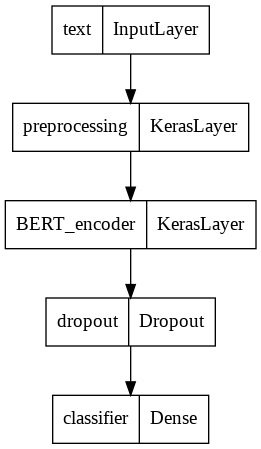

In [27]:
tf.keras.utils.plot_model(classifier_model)

In [28]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
metrics = tf.metrics.BinaryAccuracy()

# loss = tf.keras.losses.CategoricalCrossentropy(
#     from_logits=False,
#     label_smoothing=0.0,
#     axis=-1,
#     name='categorical_crossentropy'
# )

# metrics = tf.metrics.CategoricalAccuracy()

In [29]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [30]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)
# classifier_model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# labels = []
# resumes = []
# for text_batch, label_batch in train_ds.take(4):
#   for i in range(3):
#     resumes.append(text_batch.numpy()[i])
#     label = label_batch.numpy()[i]
#     #print(f'Label : {label} ({class_names[label]})')
#     labels.append(label)

#   print(resumes)
resume.head()
resumes = resume.Resume.to_numpy()
categories = resume.Category.to_numpy()

In [32]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1
Epoch 1/5
49/49 [==============================] - 122s 2s/step - loss: -83.2266 - binary_accuracy: 0.0351 - val_loss: -174.2473 - val_binary_accuracy: 0.0469
Epoch 2/5
49/49 [==============================] - 115s 2s/step - loss: -212.8829 - binary_accuracy: 0.0351 - val_loss: -250.8325 - val_binary_accuracy: 0.0469
Epoch 3/5
49/49 [==============================] - 116s 2s/step - loss: -267.5122 - binary_accuracy: 0.0351 - val_loss: -284.7938 - val_binary_accuracy: 0.0469
Epoch 4/5
49/49 [==============================] - 125s 3s/step - loss: -292.6618 - binary_accuracy: 0.0351 - val_loss: -301.0354 - val_binary_accuracy: 0.0469
Epoch 5/5
49/49 [==============================] - 124s 3s/step - loss: -303.0255 - binary_accuracy: 0.0351 - val_loss: -305.6374 - val_binary_accuracy: 0.0469


In [33]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

61/61 [==============================] - 38s 621ms/step - loss: -310.4288 - binary_accuracy: 0.0374
Loss: -310.4288330078125
Accuracy: 0.03742203861474991


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


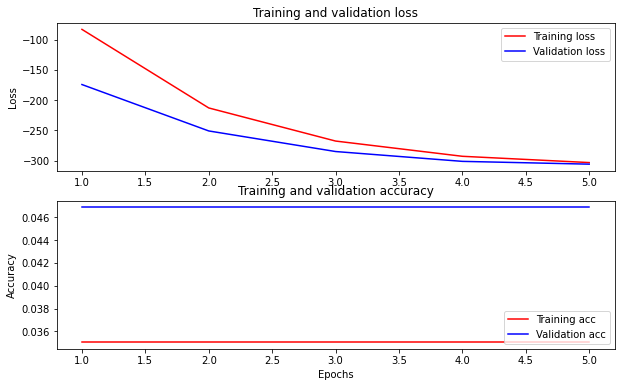

In [34]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [35]:
dataset_name = 'imdb'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

In [36]:
reloaded_model = tf.saved_model.load(saved_model_path)

In [37]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'I am an ai python developer',  # this is the same sentence tried earlier
    'I test applications',
    'I love bitcoin to the moon block',
    'I deploy computers',
    'I have great people skills'
]

reloaded_results = tf.sigmoid(reloaded_model(tf.constant(examples)))
original_results = tf.sigmoid(classifier_model(tf.constant(examples)))

print('Results from the saved model:')
print_my_examples(examples, reloaded_results)
print('Results from the model in memory:')
print_my_examples(examples, original_results)

Results from the saved model:
input: I am an ai python developer    : score: 0.731059
input: I test applications            : score: 0.731059
input: I love bitcoin to the moon block : score: 0.731059
input: I deploy computers             : score: 0.731059
input: I have great people skills     : score: 0.731059

Results from the model in memory:
input: I am an ai python developer    : score: 0.731059
input: I test applications            : score: 0.731059
input: I love bitcoin to the moon block : score: 0.731059
input: I deploy computers             : score: 0.731059
input: I have great people skills     : score: 0.731059



In [38]:
serving_results = reloaded_model \
            .signatures['serving_default'](tf.constant(examples))

serving_results = tf.sigmoid(serving_results['classifier'])

print_my_examples(examples, serving_results)

input: I am an ai python developer    : score: 0.731059
input: I test applications            : score: 0.731059
input: I love bitcoin to the moon block : score: 0.731059
input: I deploy computers             : score: 0.731059
input: I have great people skills     : score: 0.731059

